# Laptops Pricing datasets
# data wrangling
    - Identify missing data
    - Evaluating for missing data
    - Deal with missing data
    - correct data format
    - data standardization
    - data normalization
    - binning
    - indicator variable

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
data=pd.read_csv('datasets/laptop_pricing_dataset_mod2.csv')
data

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,233,Lenovo,4,2,1,7,14.0,0.896552,8,256,3.74850,1891,Medium,0,1
234,234,234,Toshiba,3,2,1,5,13.3,0.827586,8,256,2.64600,1950,Medium,1,0
235,235,235,Lenovo,4,2,1,5,12.0,0.896552,8,256,2.99880,2236,Medium,0,1
236,236,236,Lenovo,3,3,1,5,15.6,0.862069,6,256,5.29200,883,Low,1,0


# Task 1 - Visualize individual feature patterns

### Continuous valued features
Generate regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price". Also, print the value of correlation of each feature with "Price".


<Axes: xlabel='CPU_frequency', ylabel='Price'>

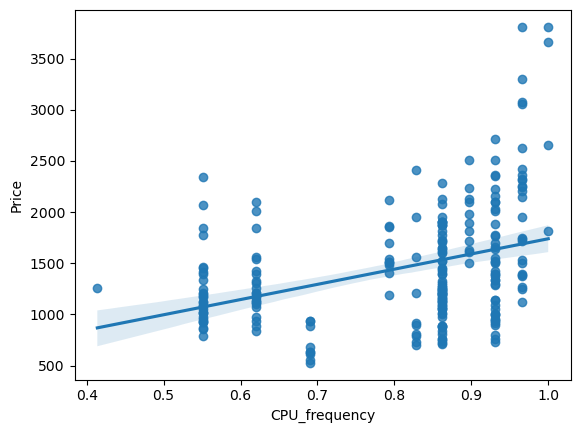

In [6]:
sns.regplot(x='CPU_frequency',y='Price',data=data)

In [8]:
data[['CPU_frequency','Price']].corr()
# weak linear relation  

,CPU_frequency,Price
CPU_frequency,1.000000,0.366666
Price,0.366666,1.000000


<Axes: xlabel='Screen_Size_inch', ylabel='Price'>

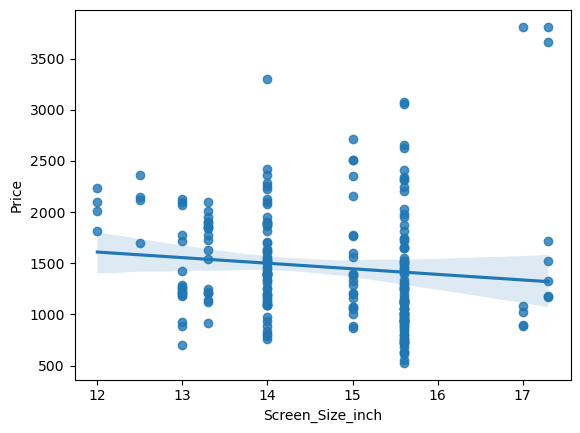

In [9]:
sns.regplot(x='Screen_Size_inch',y='Price',data=data)
# weak negitive linear realation

In [10]:
data[['Screen_Size_inch','Price']].corr()

,Screen_Size_inch,Price
Screen_Size_inch,1.000000,-0.110644
Price,-0.110644,1.000000


<Axes: xlabel='Weight_pounds', ylabel='Price'>

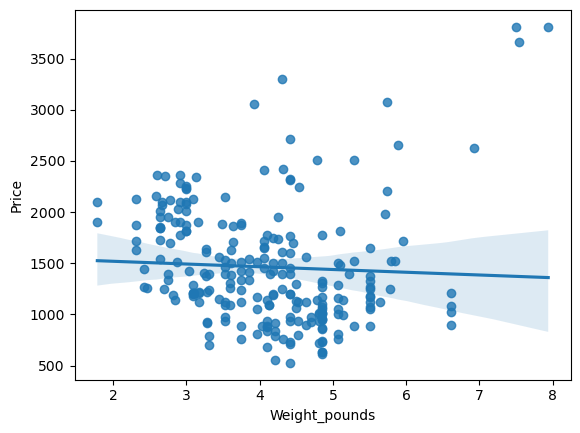

In [11]:
sns.regplot(x="Weight_pounds", y="Price", data=data)

In [12]:
data[['Weight_pounds','Price']].corr()

,Weight_pounds,Price
Weight_pounds,1.000000,-0.050312
Price,-0.050312,1.000000


In [14]:
for param in ['CPU_frequency','Screen_Size_inch','Weight_pounds']:
    print(f'Correlation of Price and {param} is {data[[param,"Price"]].corr()}')

Correlation of Price and CPU_frequency is                CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price and Screen_Size_inch is                   Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
Correlation of Price and Weight_pounds is                Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


# categorical features

<Axes: xlabel='Category', ylabel='Price'>

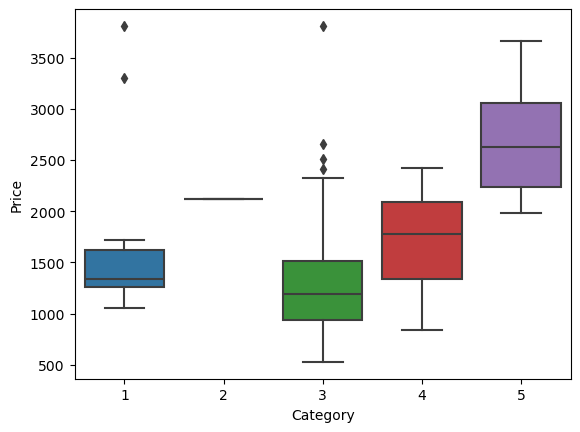

In [16]:
sns.boxplot(x='Category',y='Price',data=data)

<Axes: xlabel='GPU', ylabel='Price'>

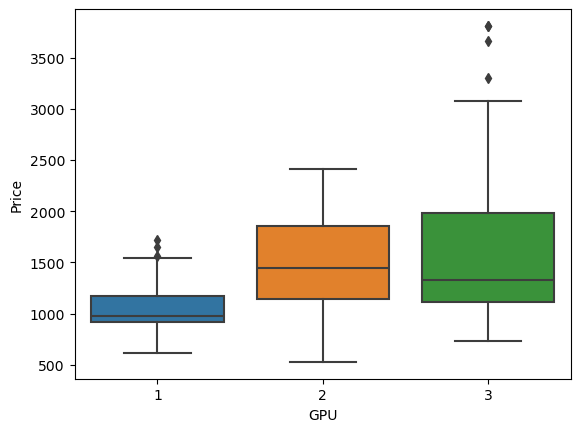

In [17]:
sns.boxplot(x='GPU',y='Price',data=data)

<Axes: xlabel='OS', ylabel='Price'>

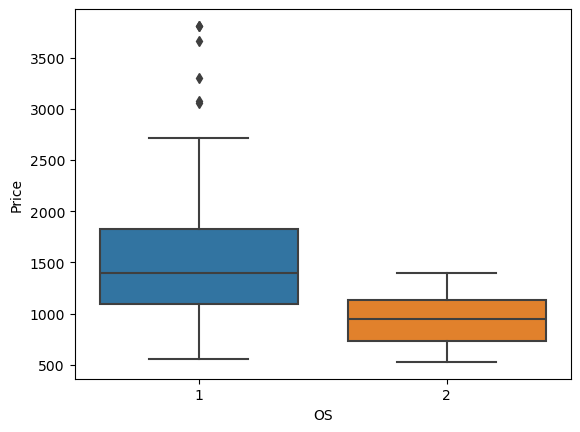

In [18]:
sns.boxplot(x='OS',y='Price',data=data)

<Axes: xlabel='CPU_core', ylabel='Price'>

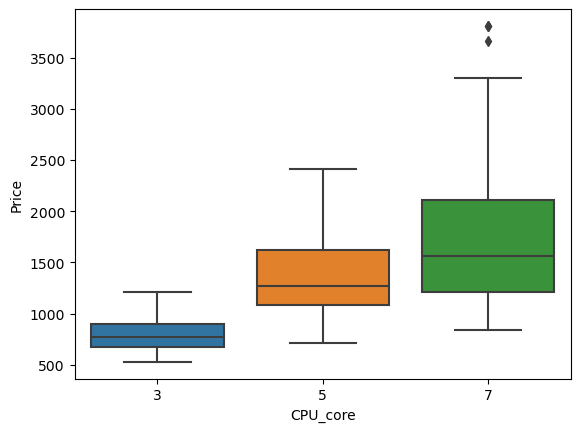

In [19]:
sns.boxplot(x='CPU_core',y='Price',data=data)

<Axes: xlabel='RAM_GB', ylabel='Price'>

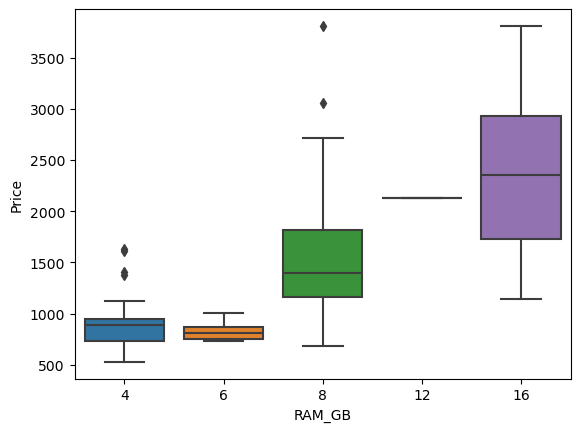

In [20]:
sns.boxplot(x='RAM_GB',y='Price',data=data)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

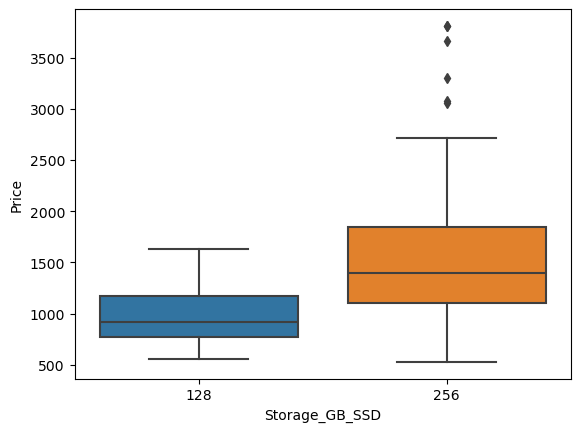

In [21]:
sns.boxplot(x='Storage_GB_SSD',y='Price',data=data)

# Task 3 - GroupBy and Pivot Tables

Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot.


In [23]:
data1=data[['GPU','CPU_core','Price']]
data1=data1.groupby(['GPU','CPU_core','Price'],as_index=False).mean()
data1

,GPU,CPU_core,Price
0,1,3,616
1,1,3,634
2,1,3,888
3,1,3,939
4,1,5,723
...,...,...,...
218,3,7,3059
219,3,7,3073
220,3,7,3301
221,3,7,3665


In [25]:
grouped_pivot=data1.pivot_table(index='GPU',columns='CPU_core')
grouped_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1169.562500
2         785.076923  1461.746835  1724.909091
3         784.000000  1225.000000  1882.820513

Text(0, 0.5, "Index([1, 2, 3], dtype='int64', name='GPU')")

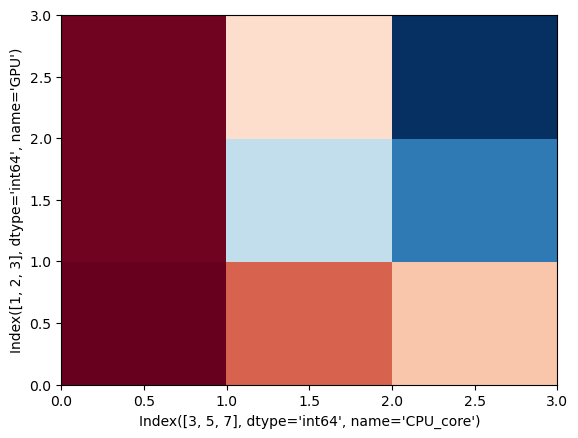

In [35]:
plt.pcolor(grouped_pivot,cmap='RdBu')
plt.xlabel(grouped_pivot.columns.levels[1])
# plt.tricks()
plt.ylabel(grouped_pivot.index)

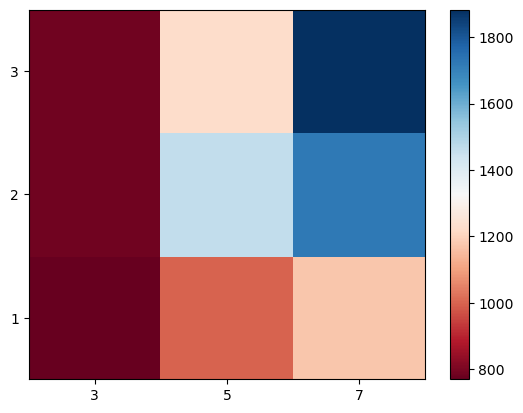

In [36]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

# Task 4 - Pearson Correlation and p-values

Use the `scipy.stats.pearsonr()` function to evaluate the Pearson Coefficient and the p-values for each parameter tested above. This will help you determine the parameters most likely to have a strong effect on the price of the laptops.


In [38]:
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    
    coeff, pval=stats.pearsonr(data[param],data['Price'])
    print(param)
    print(f'correlation coefficient {coeff} , pearson_coef {pval}')

RAM_GB
correlation coefficient 0.5492972971857841 , pearson_coef 3.681560628842986e-20
CPU_frequency
correlation coefficient 0.36666555892588615 , pearson_coef 5.5024633507132736e-09
Storage_GB_SSD
correlation coefficient 0.24342075521810297 , pearson_coef 0.00014898923191724212
Screen_Size_inch
correlation coefficient -0.11064420817118267 , pearson_coef 0.08853397846830766
Weight_pounds
correlation coefficient -0.05031225837751545 , pearson_coef 0.43976938534338944
CPU_core
correlation coefficient 0.45939777733551157 , pearson_coef 7.912950127009089e-14
OS
correlation coefficient -0.22172980114827393 , pearson_coef 0.0005696642559246697
GPU
correlation coefficient 0.2882981988881427 , pearson_coef 6.16694969836452e-06
Category
correlation coefficient 0.2862427558126414 , pearson_coef 7.225696235806464e-06
